### Building Simple Graph Using LangGraph

##### State:
* The state schema serves as the input schema for all nodes and edges in a graph.

In [6]:
# !pip install langgraph

#defining state schema
from typing_extensions import TypedDict

class State(TypedDict):
    graph_info: str

In [7]:
#defining nodes

def start_play(state:State):
    return {"graph_info": state['graph_info'] + " I am planning to play "}

def cricket(state:State):
    print("cricket node is called")
    return {"graph_info": state['graph_info'] + "cricket."}   

def football(state:State):
    print("football node is called")
    return {"graph_info": state['graph_info'] + "football."}  

#deciding node

from typing import Literal
import random
def random_play(state:State)->Literal['cricket', 'football']:
    graph_info = state['graph_info']

    if random.random() > 0.5:
        return 'cricket'
    else:
        return 'football'        

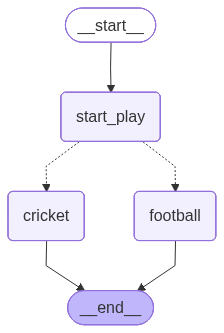

In [8]:
#graph builder

from langgraph.graph import StateGraph, START, END

#adding nodes
graph = StateGraph(State)

graph.add_node("start_play", start_play)
graph.add_node("cricket", cricket)
graph.add_node("football", football)

#adding edges
graph.add_edge(START, "start_play")
graph.add_conditional_edges("start_play", random_play)
graph.add_edge("cricket", END)
graph.add_edge("football", END)

#compiling graph
graph_builder = graph.compile()
graph_builder

In [11]:
#graph invocation

response=graph_builder.invoke({"graph_info": "Hi, This is Mounica,"})
response['graph_info']

football node is called


'Hi, This is Mounica, I am planning to play football.'